In [1]:
import warnings

import pandas as pd

# Импорт необходимых модулей
from utils import (
    calibrate_models,
    compare_models,
    create_model,
    plot_historical_data,
    plot_simulation,
    print_best_params,
    print_statistics,
    simulate_model,
)

warnings.filterwarnings("ignore")

# SORF

In [ ]:
raw_sofr_df = pd.read_excel("data/us-sofr.xlsx")
raw_sofr_df = raw_sofr_df.rename(columns={"Effective Date": "Date", "Rate (%)": "Rate"})[
    ["Date", "Rate"]
]
raw_sofr_df["Date"] = pd.to_datetime(raw_sofr_df["Date"])
raw_sofr_df["Rate"] = raw_sofr_df["Rate"] / 100

# Фильтруем данные до нашей расчетной даты
calc_date = pd.Timestamp("2021-12-10")
start_date = raw_sofr_df["Date"].values[-1]  # calc_date - pd.Timedelta(days=365 * 3)
end_date = calc_date + pd.Timedelta(days=365)
sofr_hist = raw_sofr_df[raw_sofr_df["Date"] <= calc_date].copy()
sofr_df = sofr_hist.dropna()

# Берем ставку на расчетную дату
sofr_initial = sofr_hist[sofr_hist["Date"] == calc_date]["Rate"].values[0]
print(f"Начальная ставка SOFR на 10.12.2021: {sofr_initial * 100:.4f}%")

Начальная ставка SOFR на 10.12.2021: 0.0500%


Статистика данных:
• Объем данных: 925 наблюдений
• Минимальная ставка: 0.0100%
• Максимальная ставка: 5.2500%
• Средняя ставка: 1.1053%
• Медиана: 1.5400%
• Стандартное отклонение: 1.0318%
• Коэффициент вариации: 0.9335

• 25-й перцентиль: 0.0500%
• 75-й перцентиль: 2.1200%
• IQR: 2.0700%

Анализ изменений ставок:
• Среднее дневное изменение: 0.0019%
• Волатильность изменений: 0.1437%
• Макс. рост за день: 2.7000%
• Макс. падение за день: -2.8200%


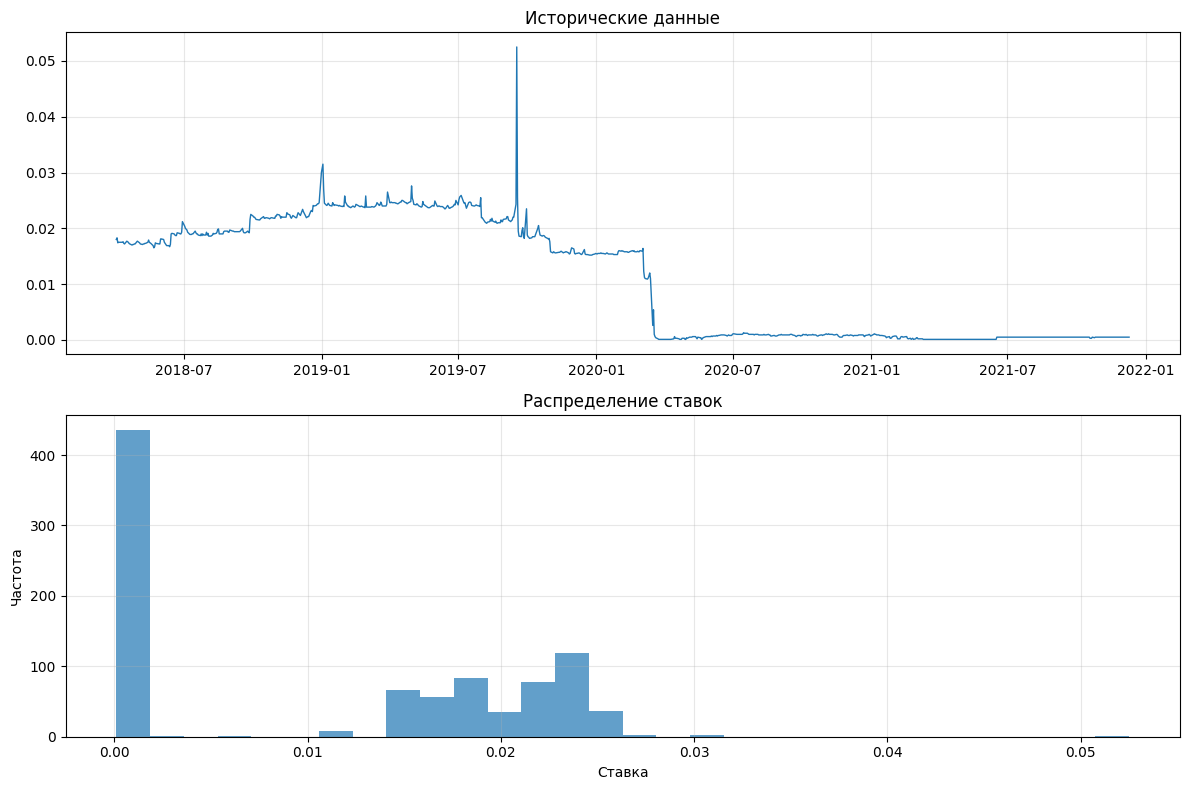

In [3]:
print_statistics(sofr_df["Rate"])
plot_historical_data(sofr_df)


Калибровка моделей...
1. Модель с постоянной theta...
   α=0.0010, σ=0.1764, θ=0.0003
2. Модель с линейной theta...
   α=0.9575, σ=0.1758, θ(t)=0.0001 + 0.0066·t
3. Модель с периодической theta...
   α=0.0202, σ=0.1760, θ(t)=0.1901 + 0.1505·sin(2π·10.0000·t)

Симуляция constant модели...


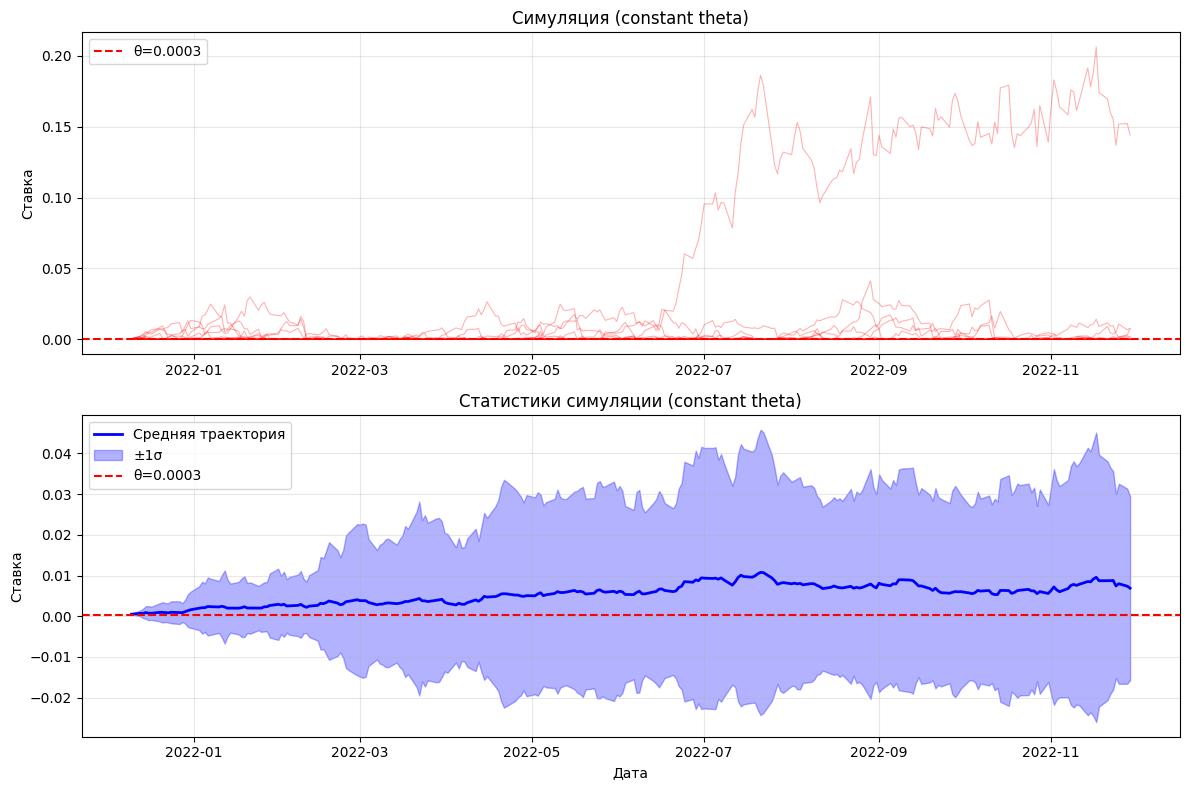


Симуляция linear модели...


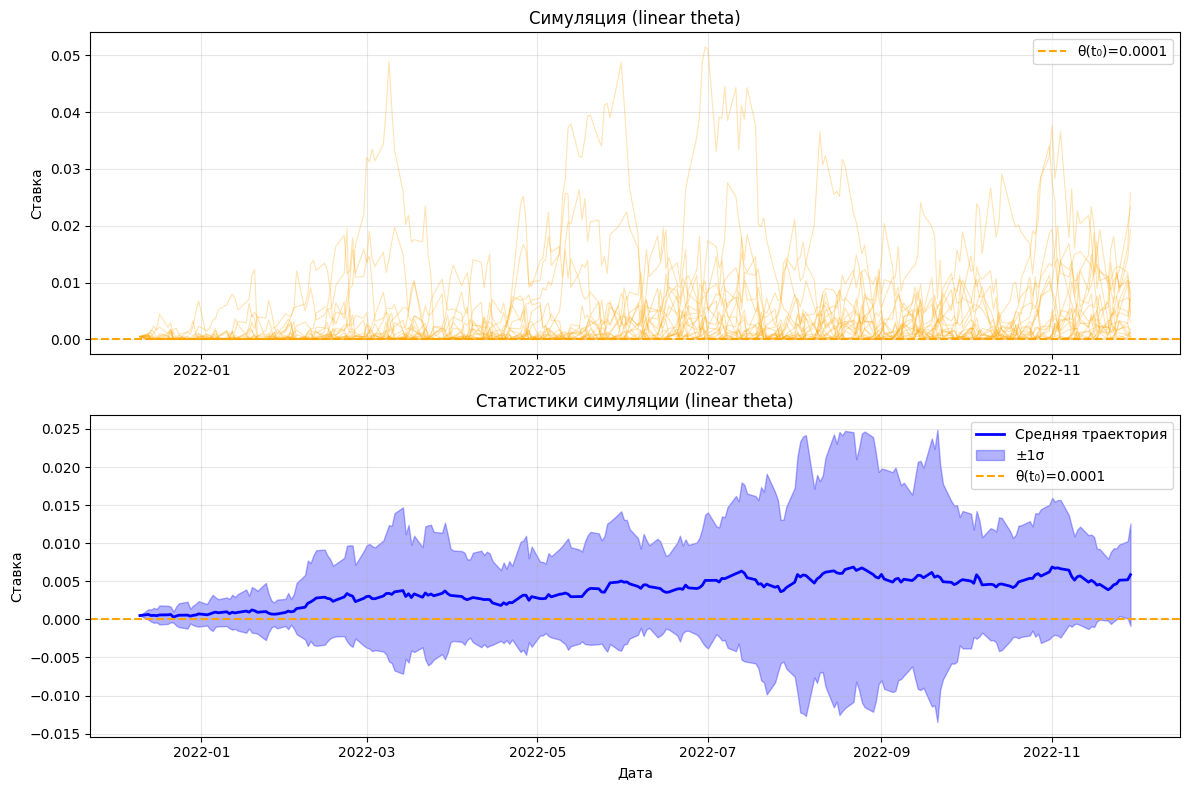


Симуляция periodic модели...


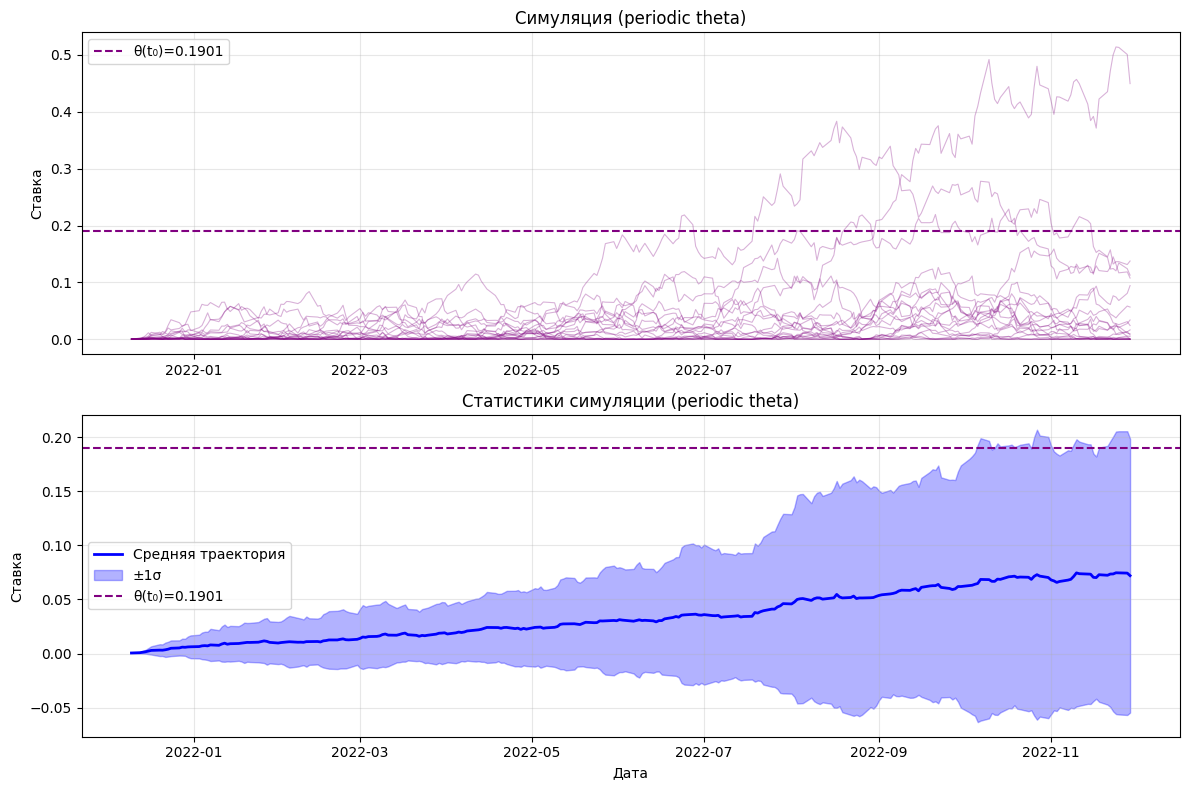

In [4]:
# Калибровка
models = calibrate_models(sofr_df["Rate"].values, mode="sofr")

# Симуляция для каждой модели
for model_type in models:
    print(f"\nСимуляция {model_type} модели...")
    model = create_model(models[model_type], model_type)
    dates, trajectories = simulate_model(model, sofr_initial, sofr_df)
    plot_simulation(dates, trajectories, model_type, models[model_type])


СРАВНЕНИЕ МОДЕЛЕЙ
Constant θ: LogL = 5494.2631
Linear θ: LogL = 5497.2451
Periodic θ: LogL = 5496.1676

Лучшая модель: linear theta
Log-правдоподобие: 5497.2451
Улучшение vs постоянная: +0.0543

График сравнения моделей...


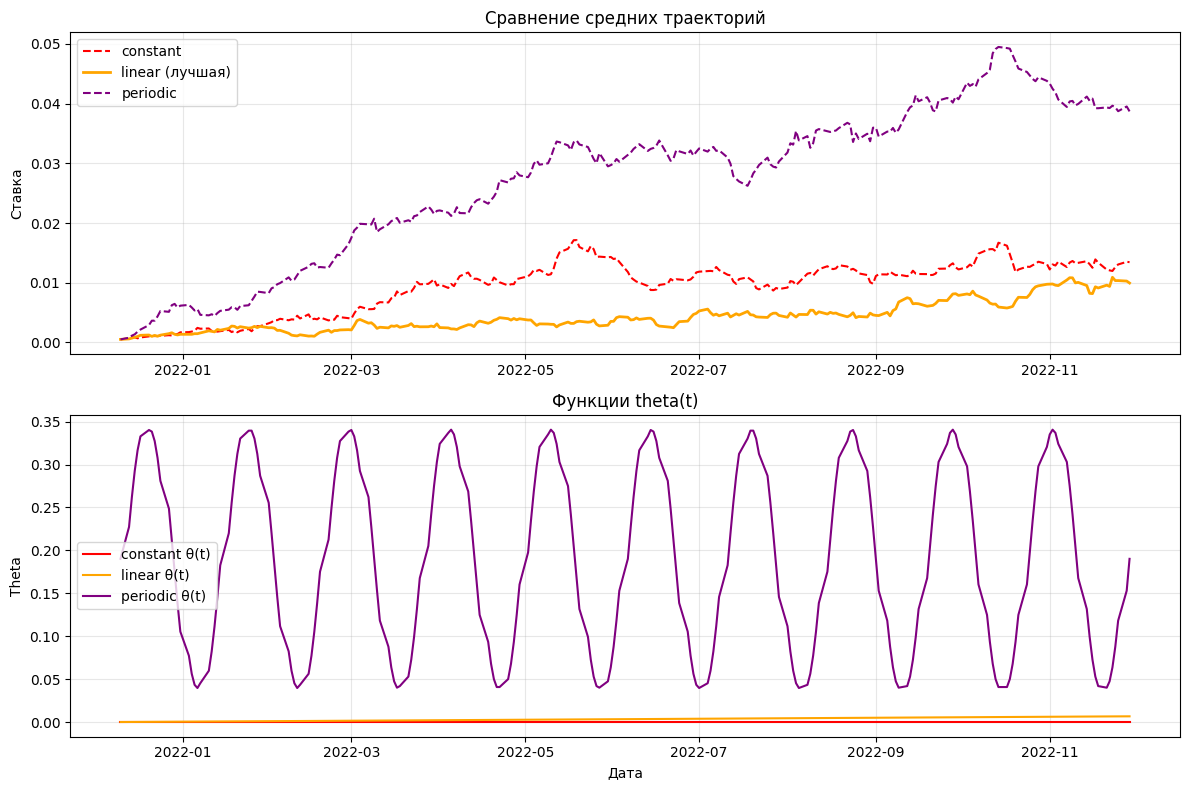


Параметры лучшей модели (linear):
• Alpha (α): 0.9575
• Sigma (σ): 0.1758
• Theta(t): 0.0001 + 0.0066·t


In [51]:
best_type = compare_models(models, sofr_df, sofr_initial)
print_best_params(models, best_type)

Статистика данных:
• Объем данных: 249 наблюдений
• Минимальная ставка: 0.0400%
• Максимальная ставка: 3.8200%
• Средняя ставка: 1.4028%
• Медиана: 0.7900%
• Стандартное отклонение: 1.3064%
• Коэффициент вариации: 0.9313

• 25-й перцентиль: 0.0500%
• 75-й перцентиль: 2.2900%
• IQR: 2.2400%

Анализ изменений ставок:
• Среднее дневное изменение: -0.0151%
• Волатильность изменений: 0.1004%
• Макс. рост за день: 0.0400%
• Макс. падение за день: -0.7500%


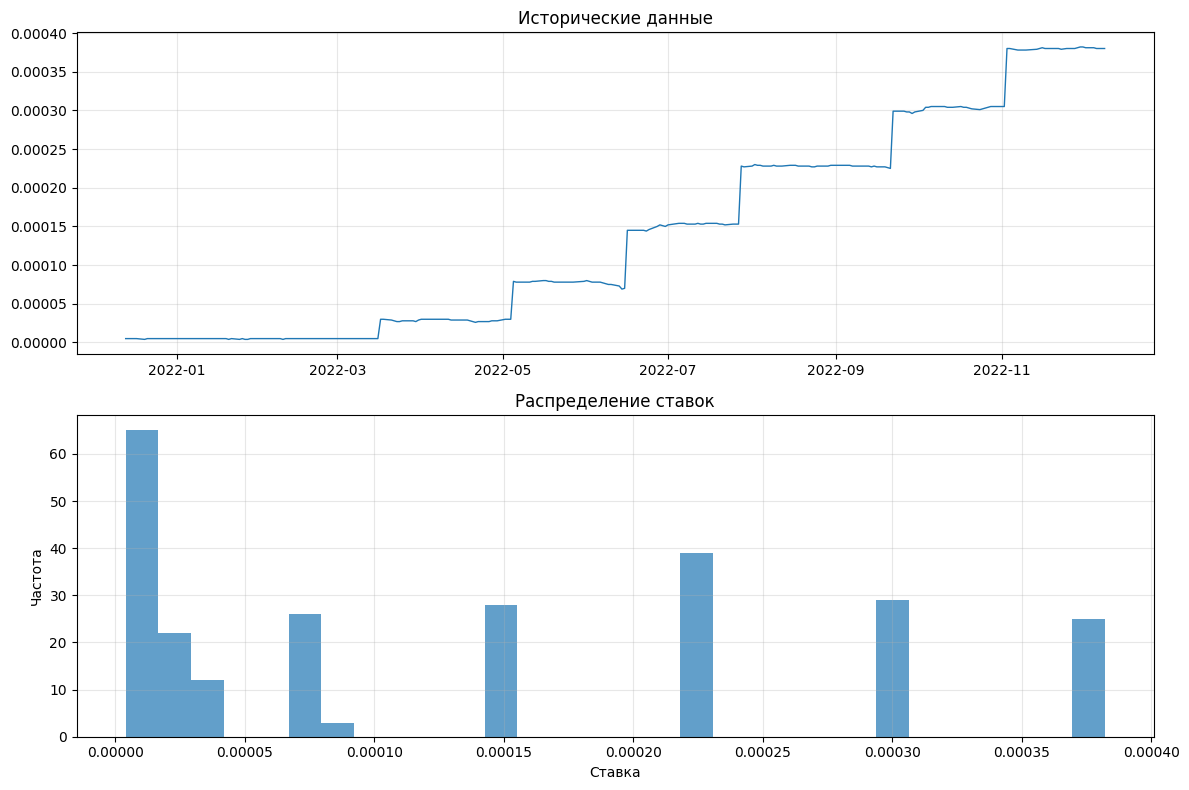

In [52]:
# Фильтруем данные после нашей расчетной даты
sofr_future = raw_sofr_df[
    (raw_sofr_df["Date"] > calc_date) & (raw_sofr_df["Date"] <= end_date)
].copy()
sofr_future = sofr_future.dropna()
sofr_future["Rate"] = sofr_future["Rate"] / 100
print_statistics(sofr_future["Rate"] * 100)
plot_historical_data(sofr_future)

# RUONIO

In [25]:
raw_ruonio_df = pd.read_excel("data/ru-ruonio.xlsx")
raw_ruonio_df = raw_ruonio_df.rename(columns={"DT": "Date", "ruo": "Rate"})[["Date", "Rate"]]
raw_ruonio_df["Date"] = pd.to_datetime(raw_ruonio_df["Date"])
raw_ruonio_df["Rate"] = raw_ruonio_df["Rate"]

# Фильтруем данные до нашей расчетной даты
ruonio_hist = raw_ruonio_df[raw_ruonio_df["Date"] <= calc_date].copy()
ruonio_df = ruonio_hist.dropna()
ruonio_df["Rate"] = ruonio_df["Rate"] / 100

# Берем ставку на расчетную дату
ruonio_initial = ruonio_df[ruonio_df["Date"] == calc_date]["Rate"].values[0]
print(f"Начальная ставка SOFR на 10.12.2021: {ruonio_initial:.4f}%")

Начальная ставка SOFR на 10.12.2021: 0.0745%


Статистика данных:
• Объем данных: 2939 наблюдений
• Минимальная ставка: 42.0000%
• Максимальная ставка: 2865.0000%
• Средняя ставка: 697.0970%
• Медиана: 652.0000%
• Стандартное отклонение: 295.6427%
• Коэффициент вариации: 0.4241

• 25-й перцентиль: 489.5000%
• 75-й перцентиль: 838.5000%
• IQR: 349.0000%

Анализ изменений ставок:
• Среднее дневное изменение: -0.1521%
• Волатильность изменений: 32.8038%
• Макс. рост за день: 435.0000%
• Макс. падение за день: -685.0000%


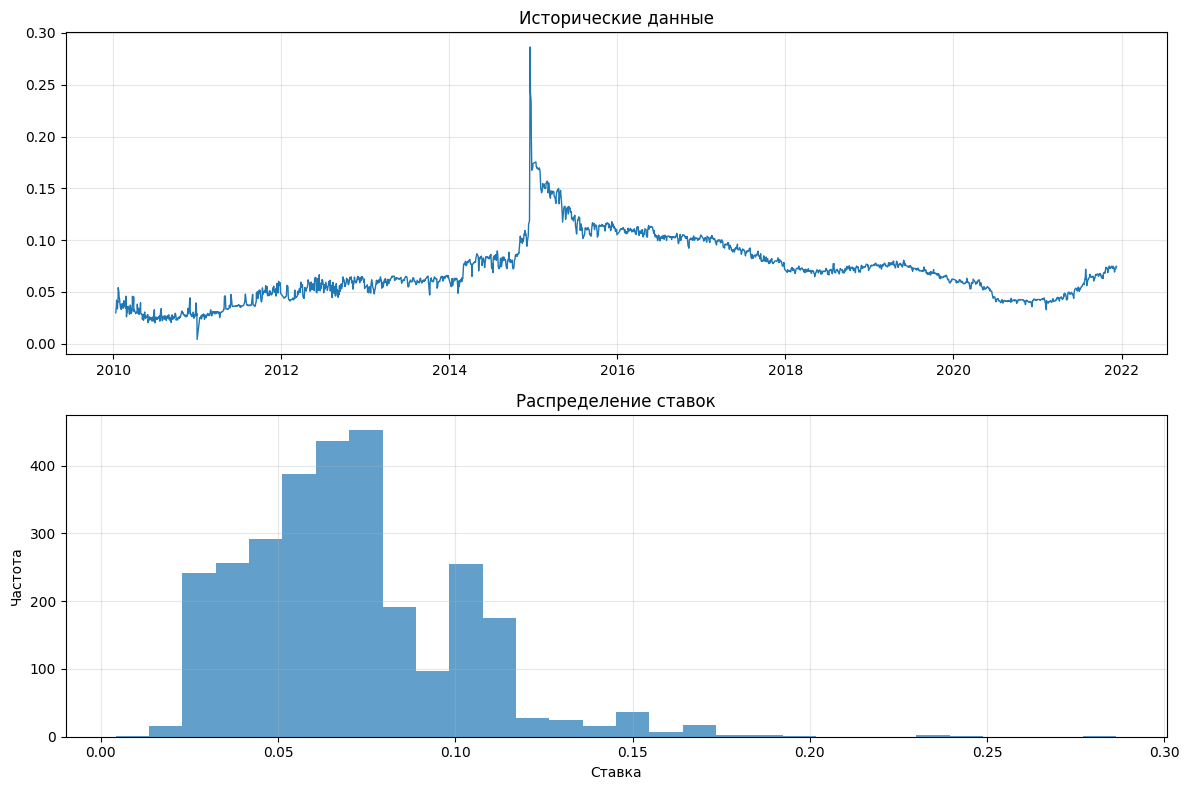

In [26]:
print_statistics(ruonio_df["Rate"] * 100)
plot_historical_data(ruonio_df)


Калибровка моделей...
1. Модель с постоянной theta...
   α=3.3959, σ=0.2126, θ=0.0686
2. Модель с линейной theta...
   α=3.4111, σ=0.2126, θ(t)=0.0691 + -0.0001·t
3. Модель с периодической theta...
   α=3.3946, σ=0.2126, θ(t)=0.0686 + 0.0001·sin(2π·0.0010·t)

Симуляция constant модели...


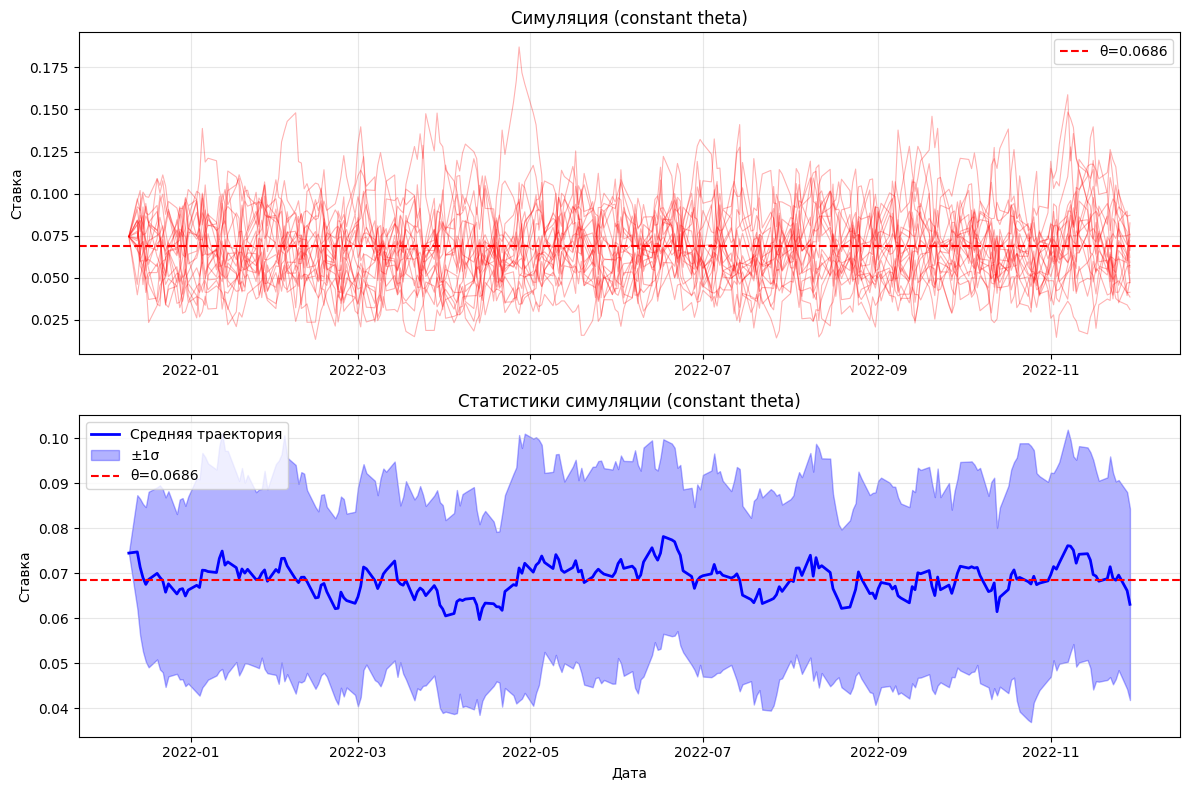


Симуляция linear модели...


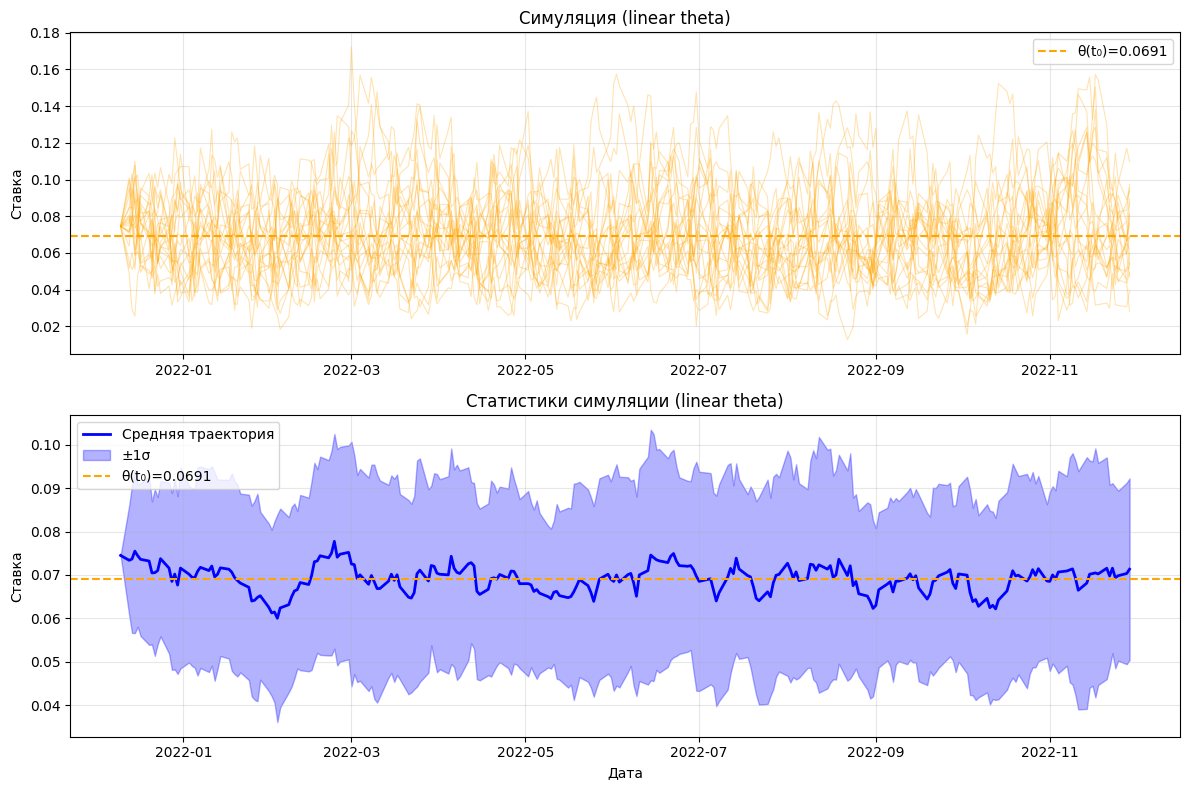


Симуляция periodic модели...


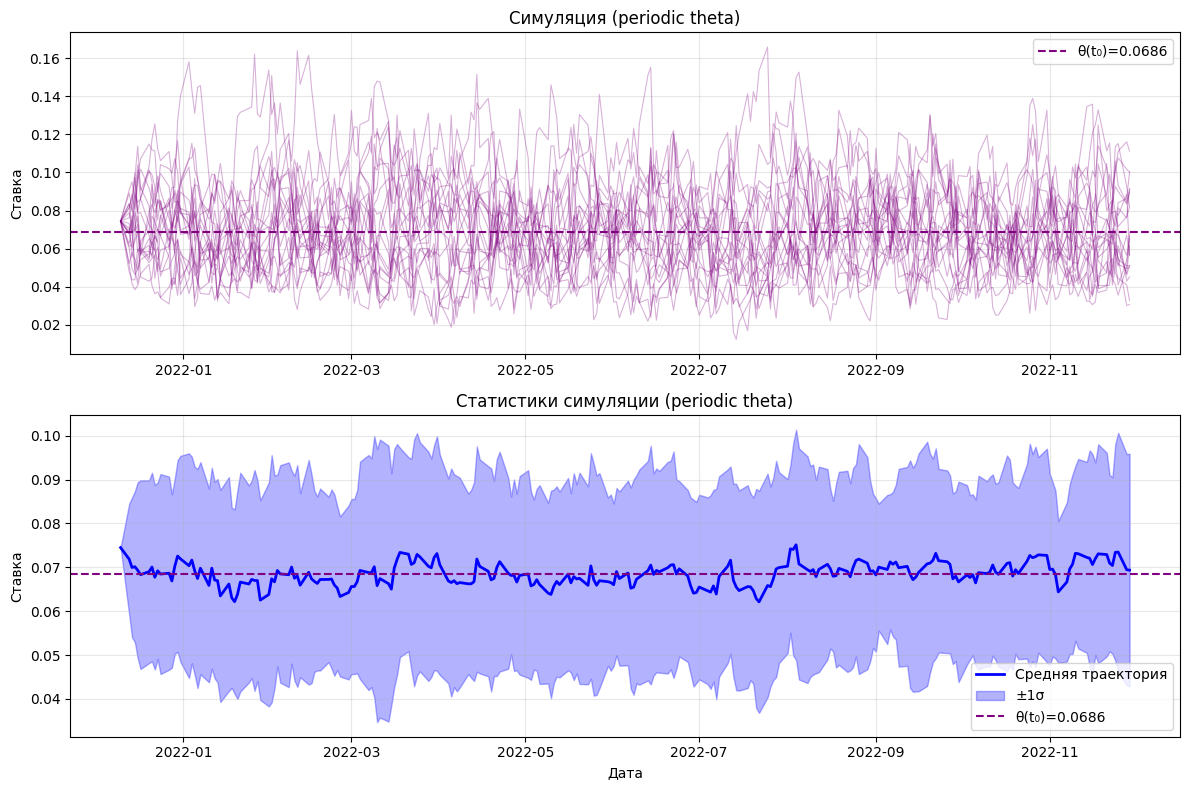

In [31]:
# Калибровка
models = calibrate_models(ruonio_df["Rate"].values, mode="rub")

# Симуляция для каждой модели
for model_type in models:
    print(f"\nСимуляция {model_type} модели...")
    model = create_model(models[model_type], model_type)
    dates, trajectories = simulate_model(model, ruonio_initial, ruonio_df)
    plot_simulation(dates, trajectories, model_type, models[model_type])


СРАВНЕНИЕ МОДЕЛЕЙ
Constant θ: LogL = 12547.4260
Linear θ: LogL = 12547.4283
Periodic θ: LogL = 12547.4260

Лучшая модель: linear theta
Log-правдоподобие: 12547.4283
Улучшение vs постоянная: +0.0000

График сравнения моделей...


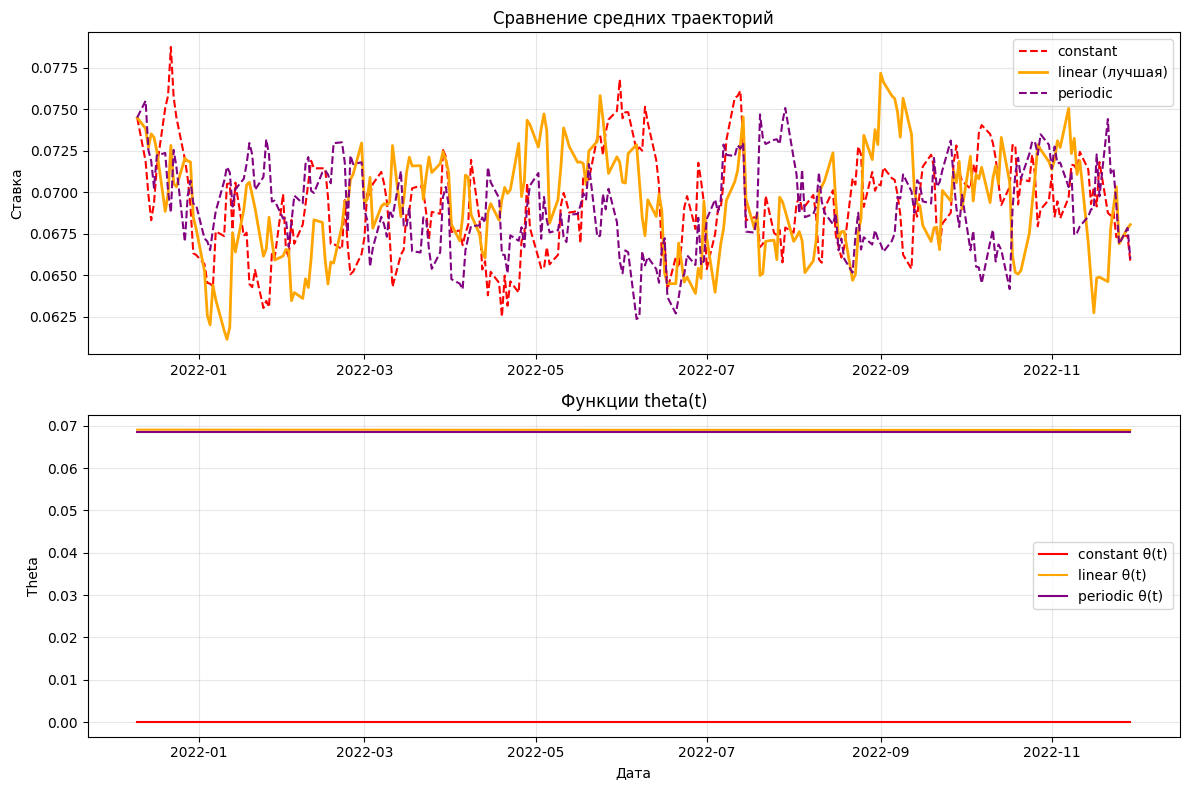


Параметры лучшей модели (linear):
• Alpha (α): 3.4111
• Sigma (σ): 0.2126
• Theta(t): 0.0691 + -0.0001·t


In [29]:
best_type = compare_models(models, ruonio_df, ruonio_initial)
print_best_params(models, best_type)

Статистика данных:
• Объем данных: 245 наблюдений
• Минимальная ставка: 682.0000%
• Максимальная ставка: 2121.0000%
• Средняя ставка: 1045.8367%
• Медиана: 826.0000%
• Стандартное отклонение: 420.2472%
• Коэффициент вариации: 0.4018

• 25-й перцентиль: 774.0000%
• 75-й перцентиль: 1070.0000%
• IQR: 296.0000%

Анализ изменений ставок:
• Среднее дневное изменение: 0.0410%
• Волатильность изменений: 74.2696%
• Макс. рост за день: 296.0000%
• Макс. падение за день: -1000.0000%


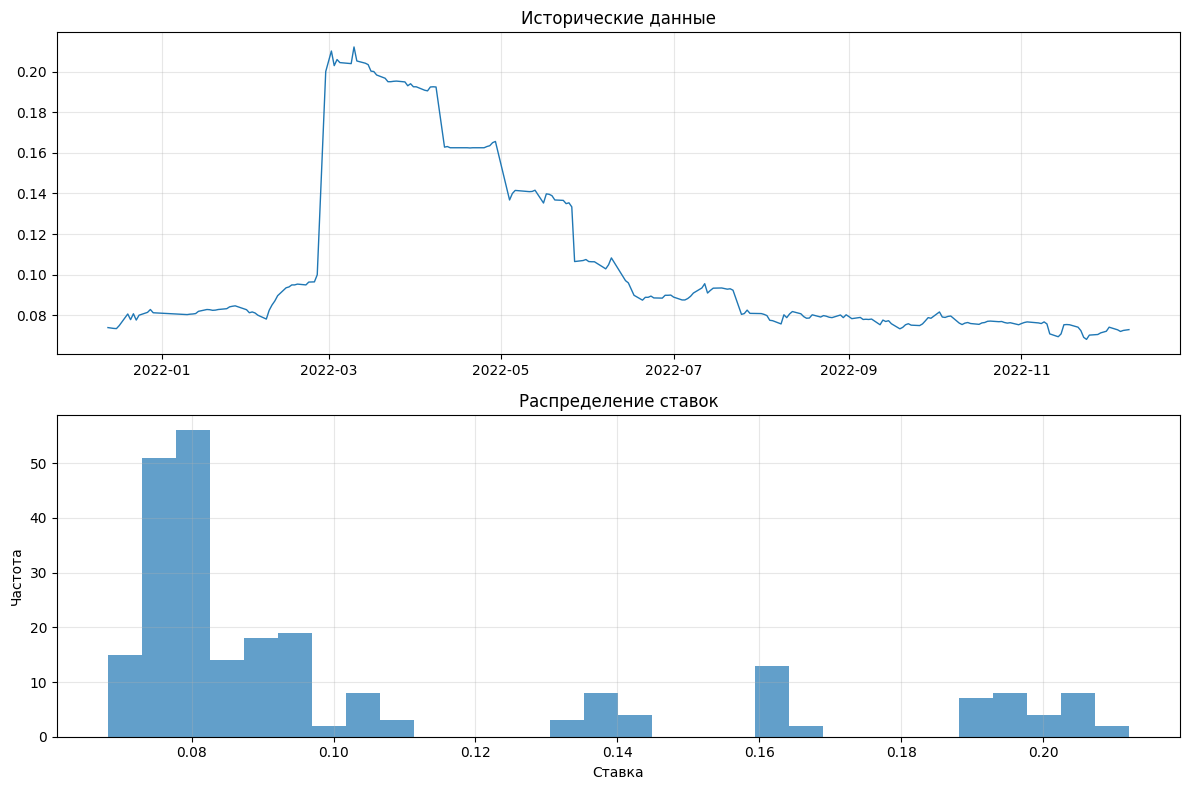

In [30]:
# Фильтруем данные после нашей расчетной даты
ruonio_future = raw_ruonio_df[
    (raw_ruonio_df["Date"] > calc_date) & (raw_ruonio_df["Date"] <= end_date)
].copy()
ruonio_future = ruonio_future.dropna()
ruonio_future["Rate"] = ruonio_future["Rate"] / 100
print_statistics(ruonio_future["Rate"] * 100)
plot_historical_data(ruonio_future)